# Notebook 3:  Redes de Kohonen y SOM (Self organized maps)
En este notebook vamos a implementar el algoritmo de clustering SOM en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Recuerde instalar previamente el paquete kohonen en R.



In [13]:
#install.packages("kohonen")
library(kohonen)
set.seed(7)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("..//data//semillas1.txt",dec=".")
datos <- as.data.frame(datos)
dim(datos)
summary(datos)

[1] 210   6

       V1              V2              V3              V4       
 Min.   :10.59   Min.   :12.41   Min.   :4.899   Min.   :2.630  
 1st Qu.:12.27   1st Qu.:13.45   1st Qu.:5.262   1st Qu.:2.944  
 Median :14.36   Median :14.32   Median :5.524   Median :3.237  
 Mean   :14.85   Mean   :14.56   Mean   :5.629   Mean   :3.259  
 3rd Qu.:17.30   3rd Qu.:15.71   3rd Qu.:5.980   3rd Qu.:3.562  
 Max.   :21.18   Max.   :17.25   Max.   :6.675   Max.   :4.033  
       V5              V6       
 Min.   :0.765   Min.   :4.519  
 1st Qu.:2.562   1st Qu.:5.045  
 Median :3.599   Median :5.223  
 Mean   :3.700   Mean   :5.408  
 3rd Qu.:4.769   3rd Qu.:5.877  
 Max.   :8.456   Max.   :6.550  

In [26]:
#help(som)

[[1]]
           V1         V2         V3          V4          V5         V6
V1 -0.9886188 -0.9781013 -0.9019465 -1.03530414  0.58627308 -0.6501815
V2 -0.2283528 -0.2662925 -0.3806364 -0.05836485 -1.00338847 -0.7207314
V3  0.4408228  0.5056410  0.5036363  0.41627012  0.16727905  0.5296840
V4  1.4241054  1.4172464  1.4136546  1.30530125 -0.07328373  1.4307335



Warning message in par(opar):
“argument 1 does not name a graphical parameter”
Warning message in par(opar):
“argument 1 does not name a graphical parameter”


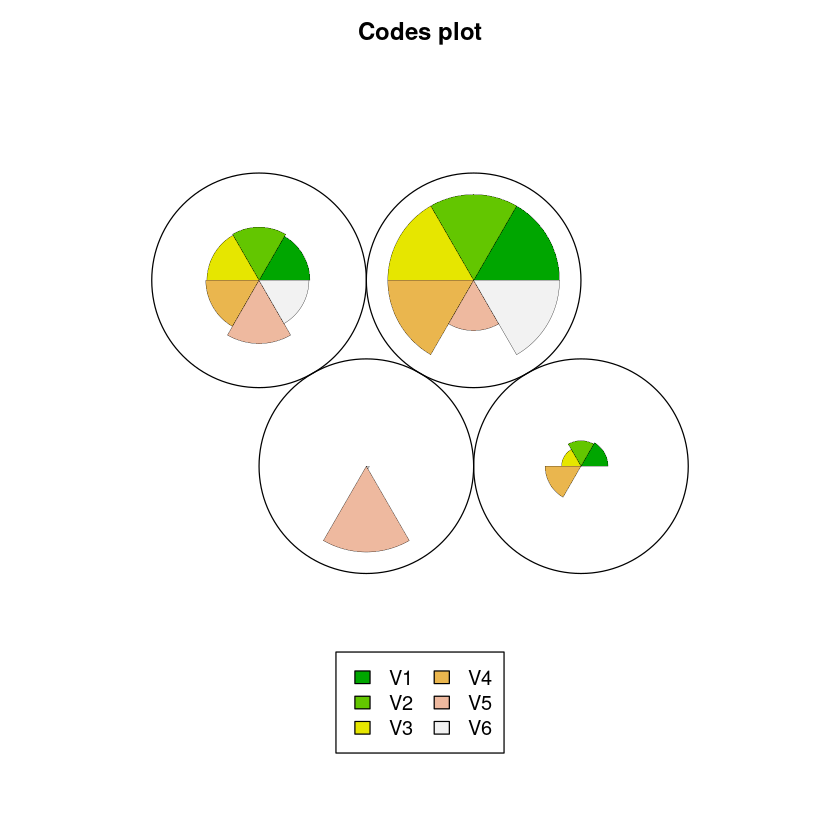

Warning message in par(opar):
“argument 1 does not name a graphical parameter”


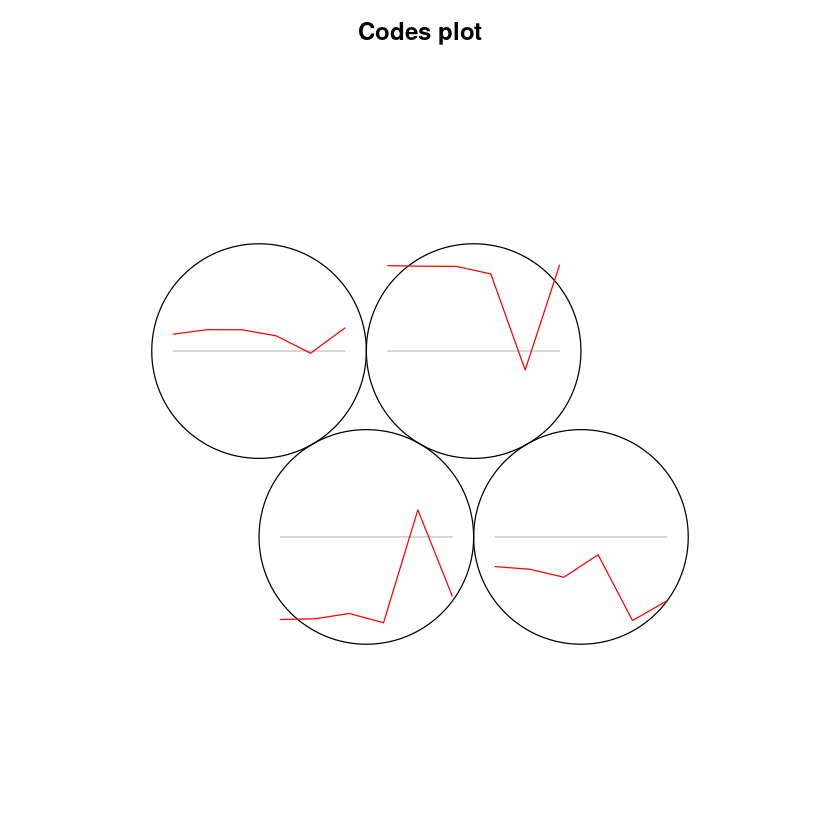

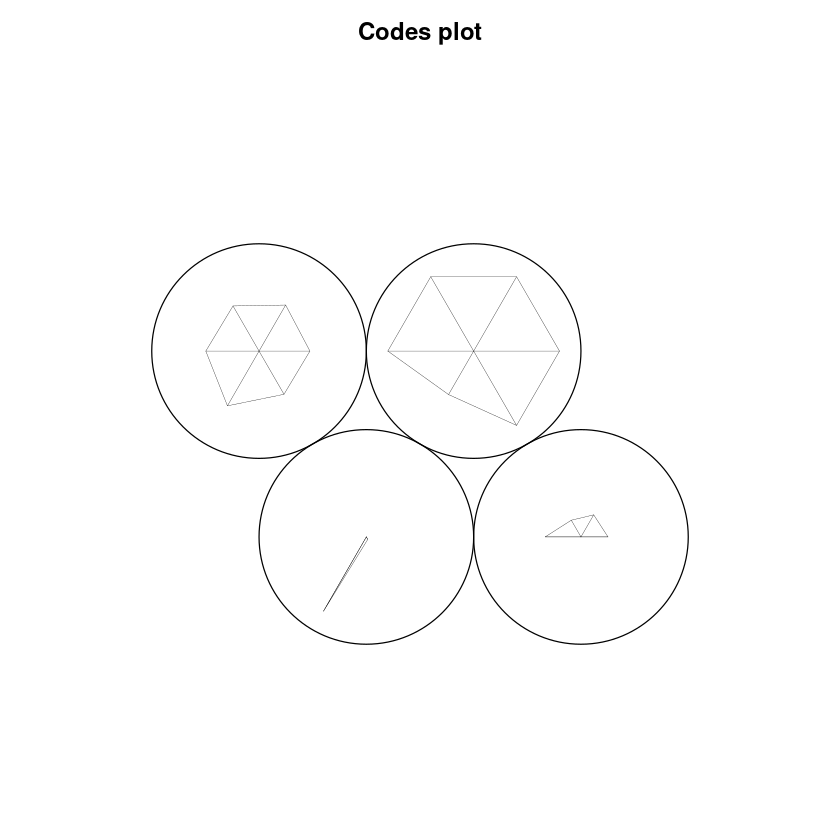

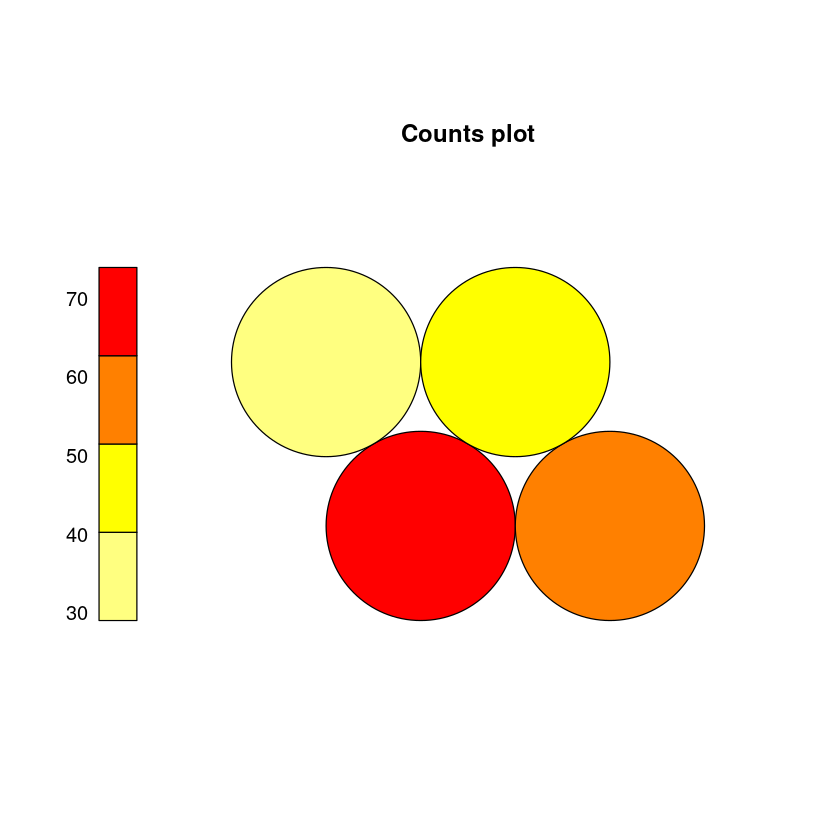

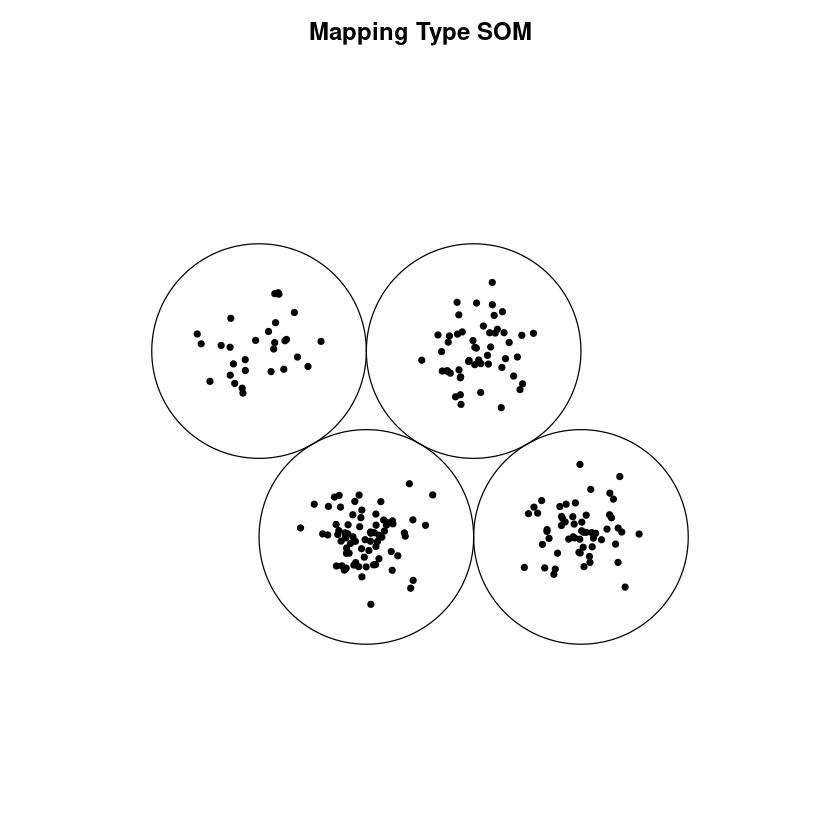

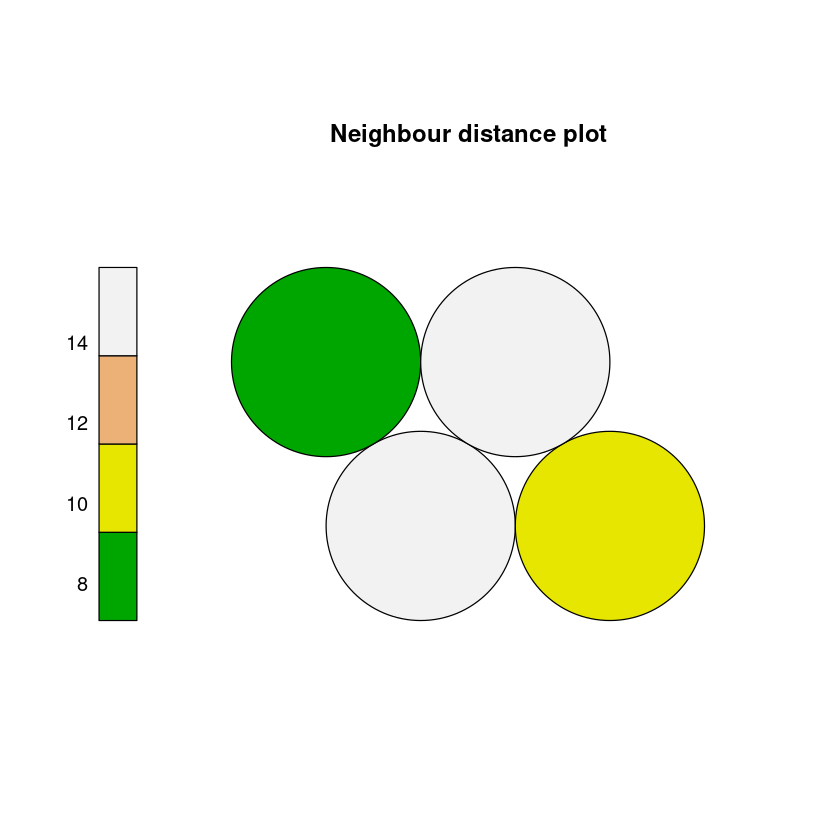

In [15]:
#create SOM grid
sommap <- som(scale(datos), grid = somgrid(2, 2, "hexagonal"))
print(sommap$codes)
plot(sommap,  codeRendering="segments")
plot(sommap,  codeRendering="lines")
plot(sommap,  codeRendering="stars")

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)


**Ejercicio 1:** 

a) Explique como funciona el método som, describa parámetros de entrada y salida y los gráficos obtenidos.

b) Modifique parámetros de entrada. Interprete y comente los resultados obtenidos. 

### R: 1.a

REFERENCIA: https://www.rdocumentation.org/packages/kohonen/versions/2.0.19/topics/som

som(data, grid=somgrid(), rlen = 100, alpha = c(0.05, 0.01), radius = quantile(nhbrdist, 0.67) * c(1, -1), init, toroidal = FALSE, n.hood, keep.data = TRUE)

### Valores de entrada:

        data: una matriz donde cada fila representa un objeto (semilla en este caso)
        grid: una grilla para los representativos. Existe la funcion somgrid para crear esta grilla
        rlen: el numero de veces en el que el set de datos completo se verá presentado a la red
        alpha: la razón de aprendimiento, se utiliza un vector que tiene dos datos. Por defecto es un decline linear desde 0.05 a 0.01 sobre las 'rlen' actualizaciones.
        radius: el radio de una vecindad, dado como un valor único o un vector (start,stop). Si es dado como un valor único el radio cubrirá desde este número hasta el valor negativo del número. Tan pronto como la vecindad sea menor a 1 la unidad vencedora será actualizadad. La configuración por defecto es empezar con un valor que cubra 2/3 de todas las distancias unidad-unidad. 
        init: Los representativos iniciales, representados como una matriz. Si se omiten, se eligen de manera aleatoria desde 'data'
        toroidal: si es TRUE, los bordes del map son unidos. Notar que en un mapa toroidal hexagonal, el número de filas debe ser par
        n.hood: La forma de la vecindad, puede ser "circular" o "cuadrada". La última es el valor por defecto para mapas rectangulares, la anterior para mapas hexagonales.
        keep.data: si o no guardar la data en un objeto de retorno

### Valores de retorno: 

        data : un objeto de la calse "kohonen" con componentes
        grid: una matriz de datos que se devuevle solo si keep.data == true
        codes: una matriz de la clase samgrid.
        changes: una matriz de vectores, que son la media de las distancias entr elos nodos vecinos.
        unit.classif: vector de las desviaciones promedios de el vector de codigos. 
        distances: Distancias de los objetos a su unidad ganadora correspondiente, solo se devuelven si keep.data == TRUE.
        toroidal: Se utiliza un mapa toroidal, explicado anteriormente.

### Gráficos

        Gráfico 1,2,3(codes plot ): Los pesos de las variables en cada nodo.

        segments: representación gráfica del mapa SOM en gráficos torta.

        lines: representación gráfica pero con lineas, util para resaltar patrones y tendencias en los datos.

        stars: a partir de la ubicación de las estrellas en el grafico, se pueden identificar agrupaciones.

        Gráfico 4 (counts plot): Es el número de observaciones por cada nodo (mientras más observaciones, más obscuros) -> Sirve para evaluar tendencias en los datos y entender sus distribuciones

        Gráfico 5 (mapping): Muestra como se han asignado las observaciones  a los diferentes nodos en el mapa SOM.

        Gráfico 6 (dist.neighbours) : la distancia entre los diferentes nodos del mapa. (ver que tan densos son)

Warning message in par(opar):
“argument 1 does not name a graphical parameter”
Warning message in par(opar):
“argument 1 does not name a graphical parameter”


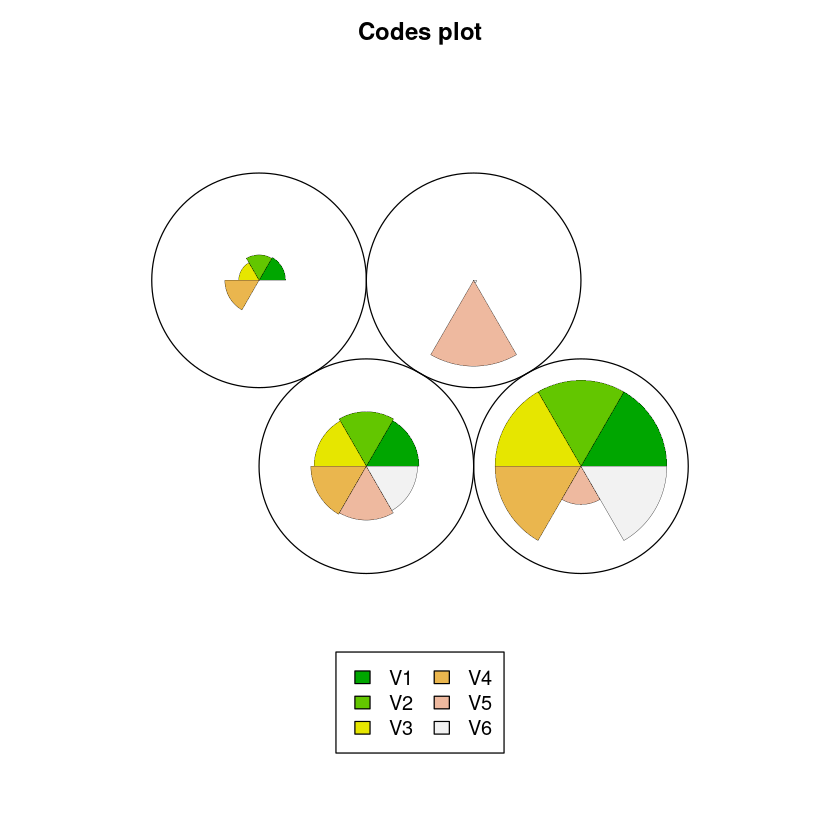

Warning message in par(opar):
“argument 1 does not name a graphical parameter”


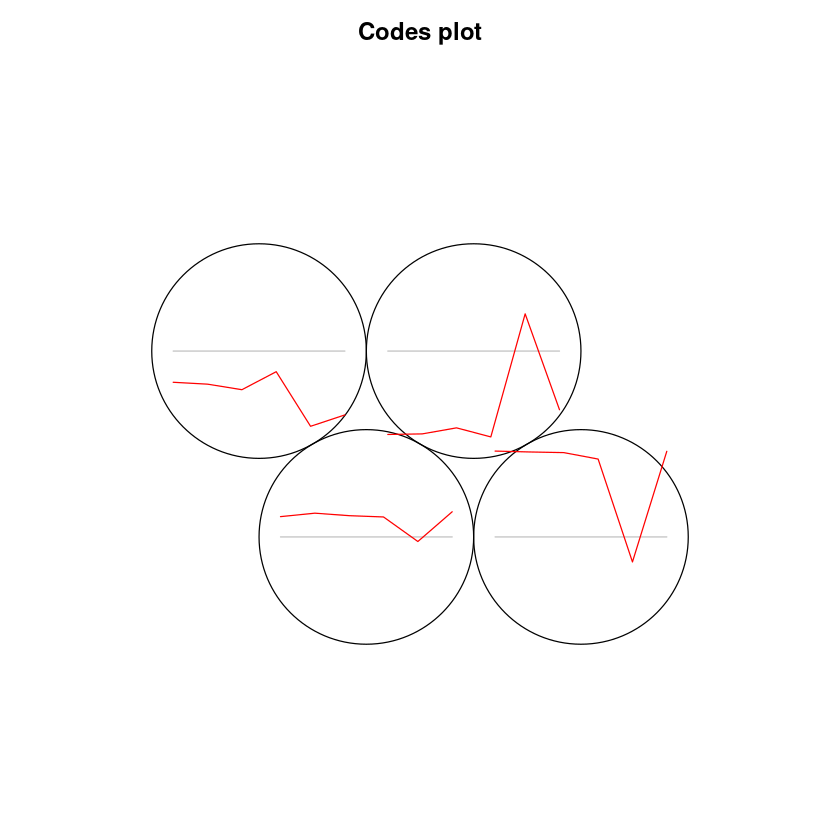

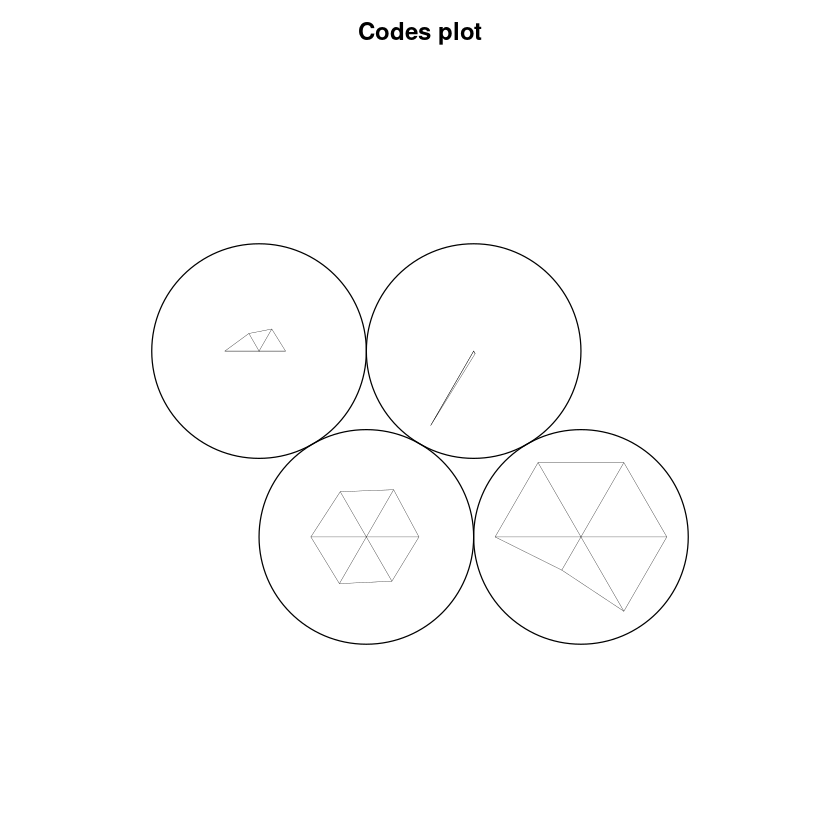

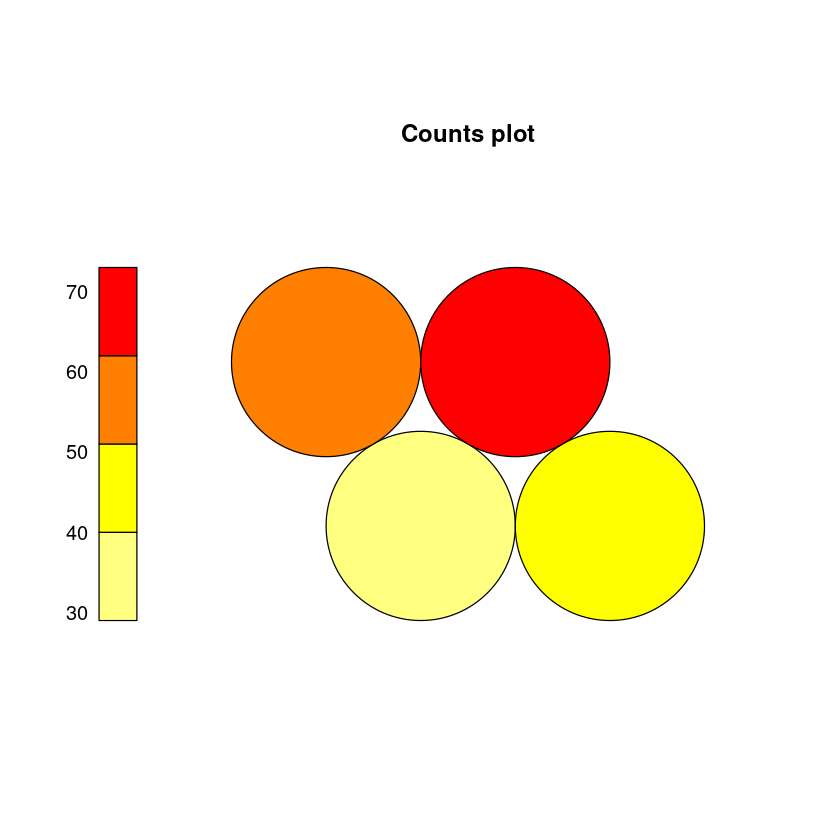

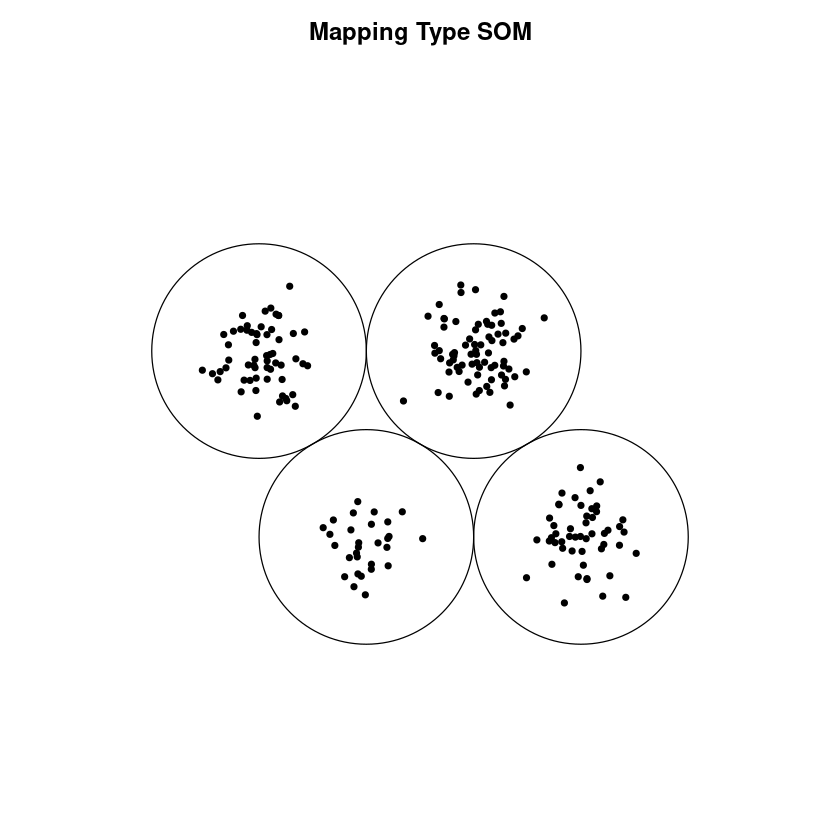

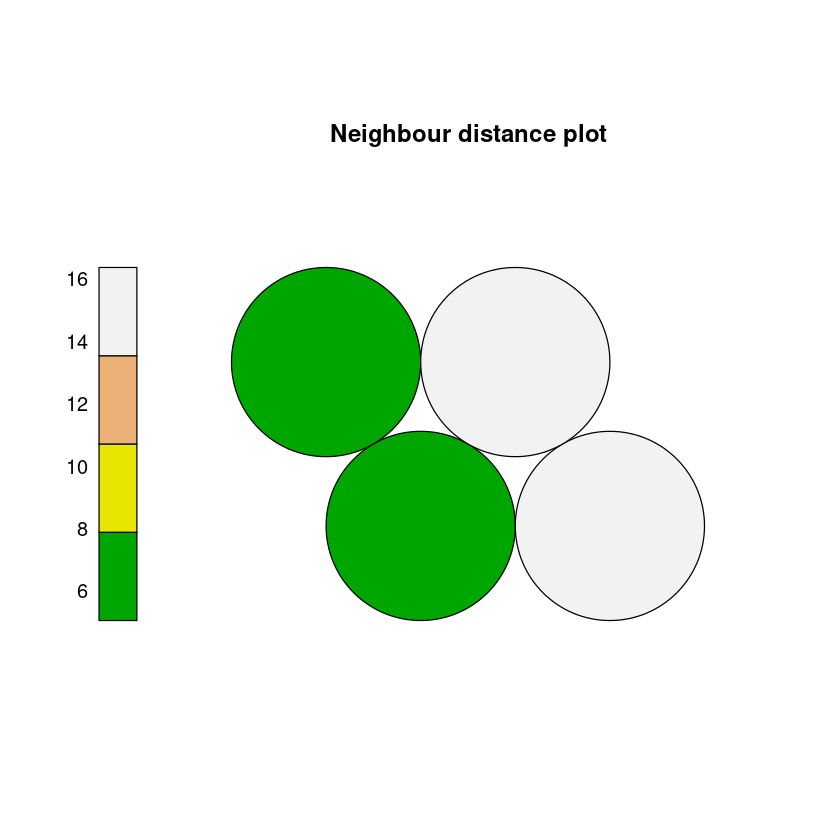

In [16]:
# 1.b)
somm <- som(scale(datos), rlen = 100, alpha = 0.01, keep.data = TRUE,grid = somgrid(2, 2, "hexagonal"))

# Rlen: Se asignó a 1000
# alpha: razón de aprendimiento, en este caso 0.05
# keep.data : true, de tal manera que se guarde en el objeto de retorno
# #print(somm$codes)
plot(somm,  codeRendering="segments")
plot(somm,  codeRendering="lines")
plot(somm,  codeRendering="stars")

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(somm, type = "counts", palette.name = colors, heatkey = TRUE)

plot(somm, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(somm, type = "dist.neighbours", palette.name = terrain.colors)


### R: 1.b

con: 
V1: área A

V2: perímetro P

V3: longitud de la semilla

V4: ancho de la semilla

V5: coeficiente de asimetría

V6: longitud de la ranura de la semilla


Codes plot: 
nodo[arr,izq]: se concentran semillas del tipo V5
nodo[arr,der]: Se concentran todos los tipos de semilla, pero el V5 en menor cantidad
nodo[abaj,izq]: Se concentran semillas del tipo desde el V1 al V4
nodo[abaj,der]: Se concentran semillasd todos los tipos de semilla en igual cantidad


Counts plot: Nodos [arr,izq] y [abaj, izq] mayores concentraciones,
y nodos [arr,der] y [abaj,der] Concentran la menor cantidad de tipos de semillas

Mapping type: Tenemos una concentración de visualizaciones parecida en todos los nodos

Neighbour distance plot: Tenenos que los nodos superiores tienen mayor distancia entre ellos y los inferiores menos distancia entre ellos (mismos)

En base a lo anterior tenemos que: 

El nodo [izq, arr] se agrupan las semillas por su coeficiente de asimetría, que es el grupo con mayor concentración.
En el nodo de la derecha y abajo se agrupan por todos menos V5 y V6.
Finalmente, para los nodos izq abajo y derecha arriba, estan relacionados con todos los grupos

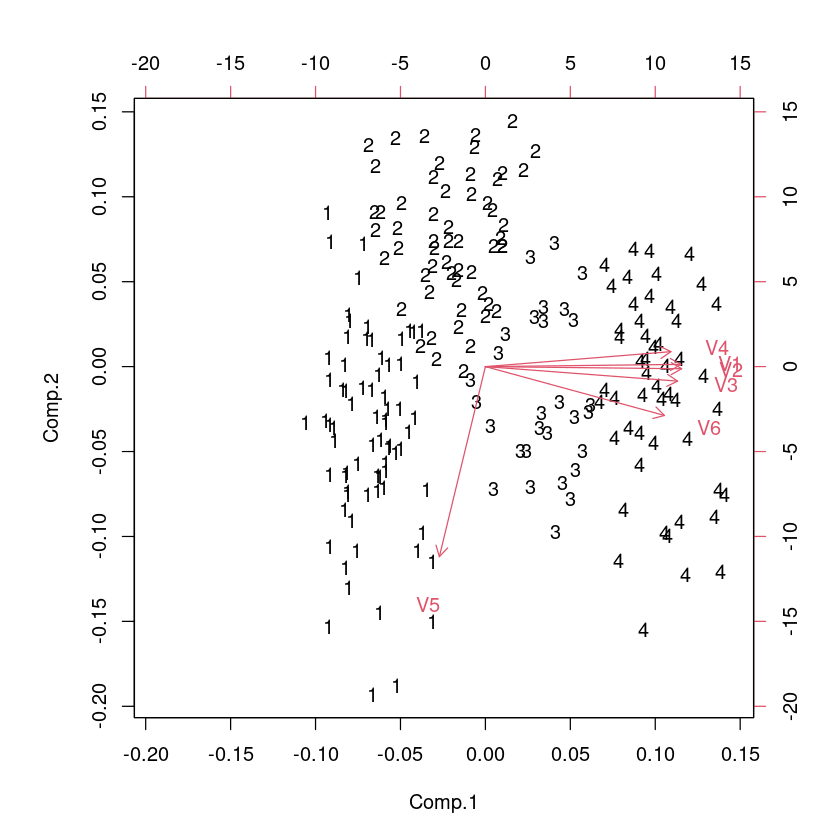

In [17]:
res <- princomp(datos, cor=TRUE)
cl <- sommap$unit.classif
biplot(res,xlabs=cl)

#### **Ejercicio 2:**

a) Explique como funciona esta nueva visualización. Interprete y comente los resultados obtenidos.

b) Complete el Ejercicio 4 de la tarea anterior con el agrupamiento que genera el método som con K=3. Compare los resultados de la medida de calidad con los otros tres métodos de clustering. Concluya.

A) Cada flecha está relacionada a una variable, si la flecha apunta en la misma dirección general que otra, esto significa que las variables están fuertemente asociadas. Cada dato en el gráfico, se muestra como el grupo al que pertenece, y este se ubica según la asociación que tenga con las variables (flechas). Como se puede visualizar existe una grán asociación entre V1, V2, V3, V4 y V6, y también se puede ver que grán parte de los datos que corresponden al grupo 4 están ubicados cercanamente a estas flechas, lo que significa una fuerte asociación del grupo a las variables correspondientes. Por otro lado V5 no presenta una grán asociación con algún grupo, pero el grupo 3 está dispuesto de manera que es el más fuertemente asociado a V5. El grupo 2 está debilmente asociado a todas las variables.

#### **Ejercicio 3:**

Considere el subconjunto de datos del archivo datosComunas.csv que ha estudiado en las tareas anteriores.

a) Realice el análisis de agrupamiento con SOM y discuta sus resultados 

b) Proponga una estrategia gráfica para representarlos.

      S10              S6               S3              S4       
 Min.   :11.89   Min.   : 4.090   Min.   :16.85   Min.   : 9.46  
 1st Qu.:16.71   1st Qu.: 4.957   1st Qu.:34.28   1st Qu.:11.31  
 Median :18.98   Median : 6.375   Median :41.66   Median :13.44  
 Mean   :19.95   Mean   : 6.766   Mean   :42.26   Mean   :15.07  
 3rd Qu.:22.66   3rd Qu.: 7.213   3rd Qu.:50.62   3rd Qu.:16.46  
 Max.   :32.15   Max.   :15.320   Max.   :72.00   Max.   :36.57  
       E2       
 Min.   :25.04  
 1st Qu.:29.86  
 Median :34.63  
 Mean   :36.12  
 3rd Qu.:40.61  
 Max.   :56.45  

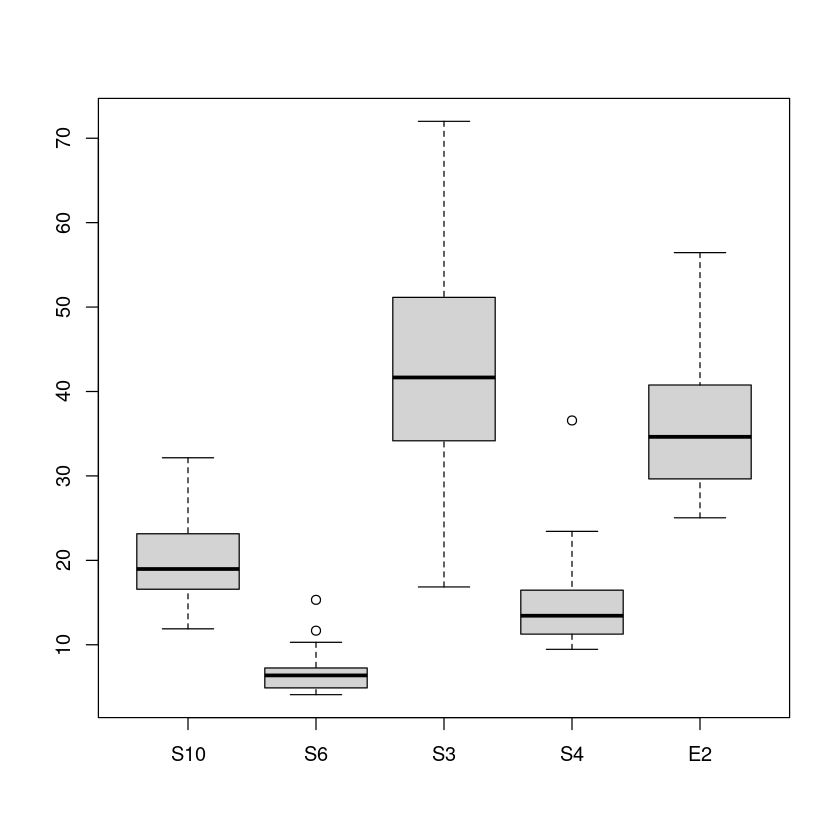

In [18]:
#a
datosComunas <- read.csv("..//data//datosComunas.csv" ,header=TRUE,sep=";", dec=",")
datos_Comunas_Procesados <- datosComunas[1:30, c('S10','S6','S3', 'S4','E2')]
summary(datos_Comunas_Procesados)
boxplot(datos_Comunas_Procesados)


In [31]:
help(som)
datos_ultra_procesados = data.matrix(datos_Comunas_Procesados)
s <- som(data=datos_ultra_procesados,grid=somgrid())

ERROR: Error in sample.int(length(x), size, replace, prob): cannot take a sample larger than the population when 'replace = FALSE'
